<IPython.core.display.Javascript object>


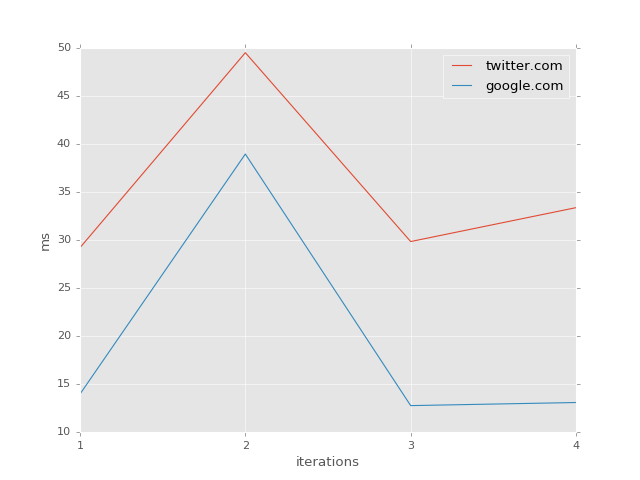

['PING twitter.com (199.59.148.82): 56 data bytes', '64 bytes from 199.59.148.82: icmp_seq=0 ttl=56 time=29.200 ms', '64 bytes from 199.59.148.82: icmp_seq=1 ttl=56 time=49.513 ms', '64 bytes from 199.59.148.82: icmp_seq=2 ttl=56 time=29.839 ms', '64 bytes from 199.59.148.82: icmp_seq=3 ttl=56 time=33.370 ms', '', '--- twitter.com ping statistics ---', '4 packets transmitted, 4 packets received, 0.0% packet loss', 'round-trip min/avg/max/stddev = 29.200/35.480/49.513/8.256 ms']
['PING google.com (216.58.193.78): 56 data bytes', '64 bytes from 216.58.193.78: icmp_seq=0 ttl=55 time=13.952 ms', '64 bytes from 216.58.193.78: icmp_seq=1 ttl=55 time=38.953 ms', '64 bytes from 216.58.193.78: icmp_seq=2 ttl=55 time=12.749 ms', '64 bytes from 216.58.193.78: icmp_seq=3 ttl=55 time=13.071 ms', '', '--- google.com ping statistics ---', '4 packets transmitted, 4 packets received, 0.0% packet loss', 'round-trip min/avg/max/stddev = 12.749/19.681/38.953/11.135 ms']
['PING amazon.com (54.239.25.192): 

In [5]:
%matplotlib notebook
import pandas as pd  
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
import ipywidgets  
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

#displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)  
display(text)

#preparing the plot 
data = pd.DataFrame()  
x = range(1,NUMBER_OF_PINGS+1)  
plots = dict()  
fig, ax = plt.subplots()  
plt.xlabel('iterations')  
plt.ylabel('ms')  
plt.xticks(x)  
plt.show()

#preparing a container to put in created checkbox per domain
checkboxes = []  
cb_container = widgets.HBox()  
display(cb_container)

#add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

#function to deal with the added domain name
def handle_submit(sender):  
    #a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    print(res)
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
         #rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        #add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

#function to deal with the checkbox update button       
def on_button_clicked(b):  
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)  
text.on_submit(handle_submit)  
plt.show()  